<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: SOBIA ALAMGIR</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/sobiahashmi) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.linkedin.com/in/sobia-alamgir-a027b939/) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/sobia-alamgir-a027b939/)
<!-- [![Streamlit](https://img.shields.io/badge/Streamlit-Open%20App-FF4B4B?style=for-the-badge&logo=streamlit&logoColor=white)](https://predict-podcast-listening-time-fgkp77kmvwwpruyistfzhj.streamlit.app/) -->


<a id="13"></a>
<h1 style="background-color:#435420;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;color:#FF9900;">Sales Forecasting using Time Series Analysis</h1>
<figcaption style="text-align: center;">
    <strong>
    </strong>
</figcaption>

**Objective:** Forecast the next 12 months of product sales using time series models.

**Deliverables:**

- Time series decomposition (trend, seasonality)
- ARIMA, Prophet or LSTM modeling
- Evaluation metrics (MAE, RMSE)
- Forecast visualizations

**Table of contents**<a id='toc0_'></a>    
    
  - [Step-01 Load Libraries](#toc1_1_)    
  - [Step-02 Load Dataset](#toc1_2_)    
  - [Step-03 Data Preprocessing](#toc1_3_)    
      - [Let's ckeck information about dataset](#toc1_3_1_1_)    
      - [Let's check description of dataset](#toc1_3_1_2_)    
      - [Let's check Null values in dataset](#toc1_3_1_3_)    
  - [Step-04 Data Visualization](#toc1_4_)    
  - [Step-05 Check Stationarity](#toc1_5_)    
  - [Step-06 Perform Differencing](#toc1_6_)    
  - [Step-07 Check Stationarity of Differenced Data](#toc1_7_)    
  - [Step-08 Fit Sarima Model](#toc1_8_)    
  - [Step-09 Forecast Future Values](#toc1_9_)    
  - [Step-10 Create Date Range for Forecasting](#toc1_10_)    
  - [Step-11 Get Forecasted values and Confidence Intervals](#toc1_11_)    
  - [Step-12 Create a Forecast DataFrame](#toc1_12_)    
  - [Step-13 Metrics Evaluation](#toc1_13_)    
    - [(i) Prepare the data](#toc1_13_1_)    
    - [(ii) Fit SARIMAX on Training data](#toc1_13_2_)    
    - [(iii) Forecast into the Future (length of test set)](#toc1_13_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Step-01 Load Libraries](#toc0_)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller # check weather data is stationary or not
from prophet import Prophet
#from keras.layers import LSTM, Dense

import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# !pip install prophet

## <a id='toc1_2_'></a>[Step-02 Load Dataset](#toc0_)

In [4]:

date_range = pd.date_range(start='2020-01-01', periods=36, freq='M')
display(date_range)

sales = np.random.poisson(lam=200, size=36) + np.linspace(0, 100, 36)
print(len(sales))

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', freq='M')

36


In [ ]:
df = pd.DataFrame({'Date': date_range, 'Sales': sales.round(2)})
display(df.head())
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

,Date,Sales
0,2020-01-31,189.00
1,2020-02-29,211.86
2,2020-03-31,212.71
3,2020-04-30,211.57
4,2020-05-31,206.43


Number of Rows: 36
Number of Columns: 2


## <a id='toc1_3_'></a>[Step-03 Data Preprocessing](#toc0_)

#### <a id='toc1_3_1_1_'></a>[Let's ckeck information about dataset](#toc0_)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    36 non-null     datetime64[ns]
 1   Sales   36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 708.0 bytes


#### <a id='toc1_3_1_2_'></a>[Let's check description of dataset](#toc0_)

In [ ]:
df.describe()

,Date,Sales
count,36,36.000000
mean,2021-07-15 21:20:00,248.277778
min,2020-01-31 00:00:00,189.000000
25%,2020-10-23 06:00:00,226.145000
50%,2021-07-15 12:00:00,249.355000
75%,2022-04-07 12:00:00,267.572500
max,2022-12-31 00:00:00,309.430000
std,NaN,32.913726


#### <a id='toc1_3_1_3_'></a>[Let's check Null values in dataset](#toc0_)

In [ ]:
df.isnull().sum()/len(df)*100

Date     0.0
Sales    0.0
dtype: float64

## <a id='toc1_4_'></a>[Step-04 Data Visualization](#toc0_)

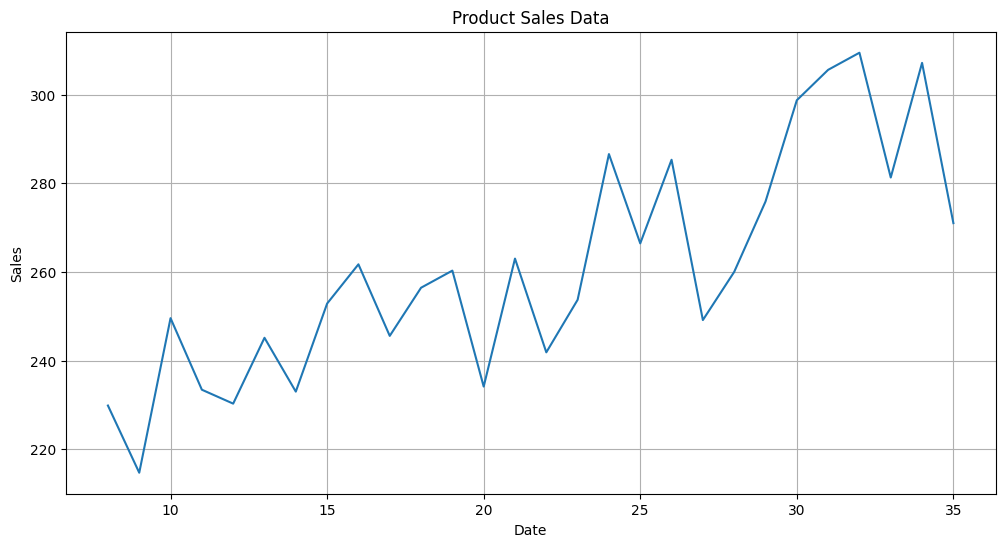

In [ ]:
# Plot the data
plt.figure(figsize = (12,6))
plt.plot(df['Sales'])
plt.title("Product Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

## <a id='toc1_5_'></a>[Step-05 Check Stationarity](#toc0_)

* **ADF Test Output:**

| Result              | Meaning                                                         |
| ------------------- | --------------------------------------------------------------- |
| **Test Statistic**  | Should be lower than critical values to reject non-stationarity |
| **p-value < 0.05**  | Strong evidence to say “data is stationary”                     |
| **Critical Values** | Thresholds for different confidence levels (1%, 5%, 10%)        |


In [32]:
def test_stationarity(timeseries):
    dftest = adfuller(timeseries , autolag = 'AIC') # AIC = Akaike Information Criterion
    # auto lag sets number of lags Automatically

    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', 'Lags Used', 'Observations Used'])

    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    return dfoutput

result = test_stationarity(df["Sales"])
print("Augmented Dicky Fuller Test (ADF):")
print(result)

Augmented Dicky Fuller Test (ADF):
Test Statistic          -0.337632
p-value                  0.920003
Lags Used                5.000000
Observations Used       30.000000
Critical Value (1%)     -3.669920
Critical Value (5%)     -2.964071
Critical Value (10%)    -2.621171
dtype: float64


**Insights:**
* Test Statistics is not less than Critical Values, shows data is not stationary.
* p-value is not less than 0.05, shows data is not stationary
* Data is not statioanry, it Fail to reject H₀ → Data is not stationary

| p-value  | What it means                                  |
| -------- | ---------------------------------------------- |
| `< 0.05` | Reject H₀ → Data **is stationary**             |
| `> 0.05` | Fail to reject H₀ → Data **is not stationary** |


## <a id='toc1_6_'></a>[Step-06 Perform Differencing](#toc0_)

In [51]:
df["Sales_Diff1"] = df["Sales"] - df["Sales"].shift(1)


df["Sales_Diff2"] = df["Sales_Diff1"] - df["Sales_Diff1"].shift(1)

df_diff = pd.DataFrame({"Sales":df["Sales"], "Sales_Diff1":df["Sales_Diff1"] , "Sales_Diff2": df["Sales_Diff2"]})
df_diff.dropna(inplace = True)
display(df_diff.head())
print("Number of Records:", df_diff.shape[0])
print("Number of Features:", df_diff.shape[1])

,Sales,Sales_Diff1,Sales_Diff2
8,229.86,14.86,-4.00
9,214.71,-15.15,-30.01
10,249.57,34.86,50.01
11,233.43,-16.14,-51.00
12,230.29,-3.14,13.00


Number of Records: 28
Number of Features: 3


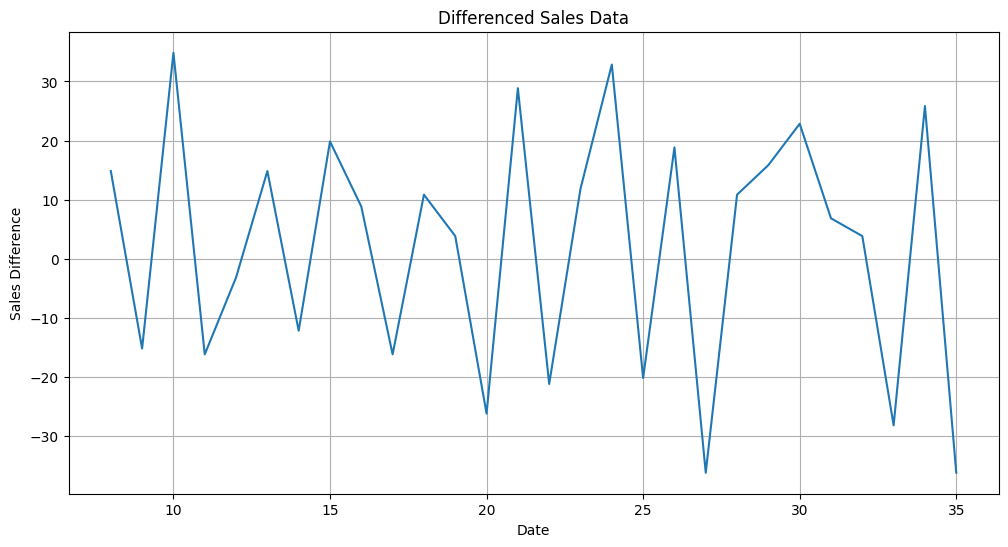

In [71]:
plt.figure(figsize = (12,6))
plt.plot(df["Sales_Diff1"])
plt.title("Differenced Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales Difference")
plt.grid(True)
plt.show()  

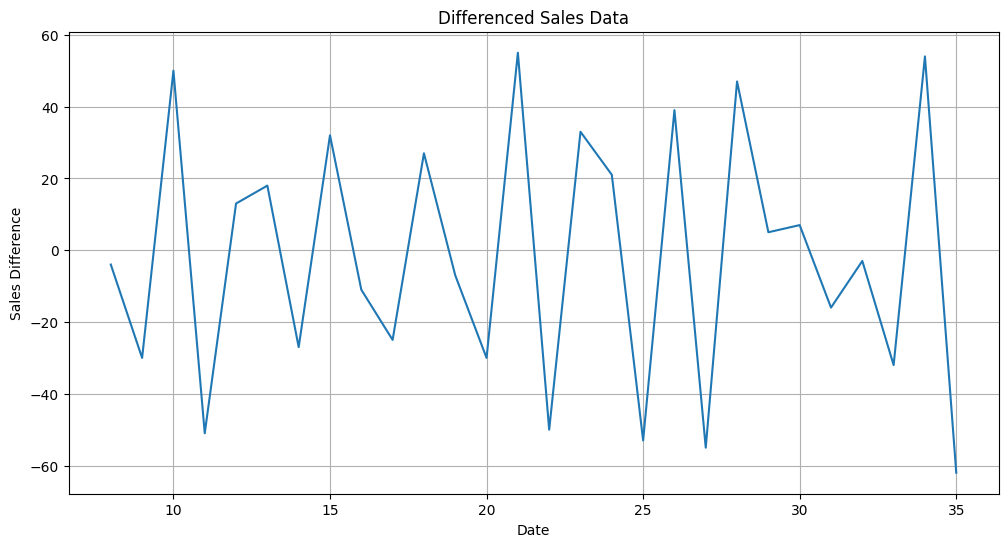

In [70]:
plt.figure(figsize = (12,6))
plt.plot(df["Sales_Diff2"])
plt.title("Differenced Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales Difference")
plt.grid(True)
plt.show()  

* **Let's compare Original, 1st Differenced and 2nd Differenced Series all together**

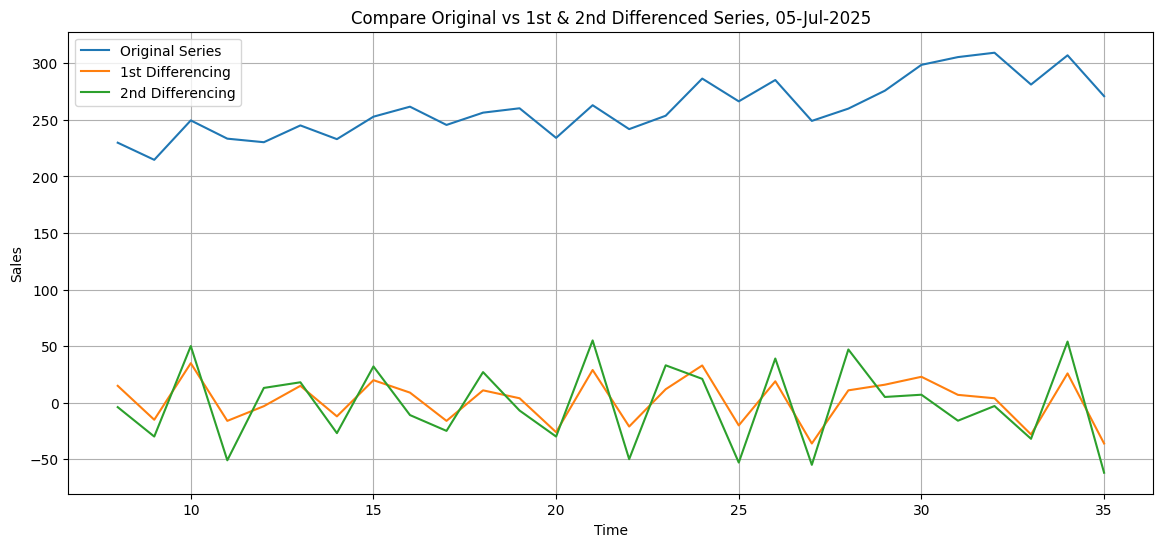

In [74]:
df_clean = df[["Sales", "Sales_Diff1", "Sales_Diff2"]].dropna()

# Plotting
plt.figure(figsize=(14, 6))

plt.plot(df_clean["Sales"], label="Original Series")
plt.plot(df_clean["Sales_Diff1"], label="1st Differencing")
plt.plot(df_clean["Sales_Diff2"], label="2nd Differencing")

plt.title("Compare Original vs 1st & 2nd Differenced Series, 05-Jul-2025")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

**Insights:**
- This shows second differencing is not given us remarkable change. So its better to work with first Differened data.

## <a id='toc1_7_'></a>[Step-07 Check Stationarity of Differenced Data](#toc0_)

In [ ]:
df.dropna(inplace = True)
result = test_stationarity(df["Sales_Diff1"])
print("Augmented Dicky Fuller Test (ADF) on differenced Data:")
print(result)

Augmented Dicky Fuller Test (ADF) on differenced Data:
Test Statistic         -5.731602e+00
p-value                 6.580748e-07
Lags Used               4.000000e+00
Observations Used       2.300000e+01
Critical Value (1%)    -3.752928e+00
Critical Value (5%)    -2.998500e+00
Critical Value (10%)   -2.638967e+00
dtype: float64


## <a id='toc1_8_'></a>[Step-08 Fit Sarima Model](#toc0_)

In [ ]:
model_SARIMA = SARIMAX(df["Sales_Diff1"], order = (1,1,1), seasonal_order=(1,1,1,12))
result = model_SARIMA.fit(disp=False)
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        Sales_Diff1   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -68.836
Date:                            Sat, 05 Jul 2025   AIC                            147.673
Time:                                    04:36:08   BIC                            151.213
Sample:                                         0   HQIC                           147.635
                                             - 28                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5125      0.354     -1.448      0.148      -1.206       0.181
ma.L1         -0.9994    167.487   

## <a id='toc1_9_'></a>[Step-09 Forecast Future Values](#toc0_)

In [ ]:
forcast_steps = 12
forecast = result.get_forecast(steps = forcast_steps)

## <a id='toc1_10_'></a>[Step-10 Create Date Range for Forecasting](#toc0_)

In [ ]:
df_forecasting = pd.date_range(start = df.index[-1], periods = forcast_steps + 1 , freq = 'M')

## <a id='toc1_11_'></a>[Step-11 Get Forecasted values and Confidence Intervals](#toc0_)

In [ ]:
forecast_values  = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

## <a id='toc1_12_'></a>[Step-12 Create a Forecast DataFrame](#toc0_)

In [ ]:
forecast_df = pd.DataFrame({'Forecast': forecast_values, 'Lower_CI':forecast_conf_int.iloc[:,0] , \
                             'Upper_CI' : forecast_conf_int.iloc[:,1]}) # , index = date_range[1:]
forecast_df.head()

,Forecast,Lower_CI,Upper_CI
28,-11.491381,-20.074532,-2.908230
29,0.059596,-8.638574,8.757766
30,-23.430889,-32.660932,-14.200845
31,6.417017,-2.684698,15.518732
32,-3.430935,-12.657475,5.795605


## <a id='toc1_13_'></a>[Step-13 Metrics Evaluation](#toc0_)

### <a id='toc1_13_1_'></a>[(i) Prepare the data](#toc0_)

- ❗Why not shuffle like in normal ML?
- Because in time series, order matters! You must respect the time sequence.
- So we always split from past → future, not randomly.

In [ ]:
train_size = int(len(df["Sales_Diff1"]) * 0.8)  # 80% of data
train, test = df[:train_size], df[train_size:]

print("Train size:", len(train))
print("Test size:", len(test))

Train size: 22
Test size: 6


### <a id='toc1_13_2_'></a>[(ii) Fit SARIMAX on Training data](#toc0_)

In [ ]:
model = SARIMAX(df["Sales_Diff1"], order = (1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()

### <a id='toc1_13_3_'></a>[(iii) Forecast into the Future (length of test set)](#toc0_)

In [96]:
start = len(train)
end = len(train) + len(test) - 1

predictions = model_fit.predict(start=start, end=end, typ='levels')


In [99]:
mse = mean_squared_error(test['Sales'].values, predictions.values)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 90031.62963502556
RMSE: 300.0527114275516


<a id="13"></a>
<h1 style="background-color:#435420;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;color:#FF9900;">Thankyou</h1>
<figcaption style="text-align: center;">
    <strong>
    </strong>
</figcaption>